<a href="https://colab.research.google.com/github/matheustoneti/HousePricePredictionChallenge/blob/main/House_Price_Prediction_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
test = pd.read_csv('/content/gdrive/MyDrive/test.csv')
train = pd.read_csv('/content/gdrive/MyDrive/train.csv')

In [6]:
train.head(10)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
5,Owner,0,0,3,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0
6,Dealer,0,0,3,BHK,1495.053957,1,1,"Sodala,Jaipur",26.916347,75.795600,66.5
7,Owner,0,1,3,BHK,1181.012946,1,1,"Kharar,Mohali",30.740000,76.650000,52.0
8,Dealer,0,1,2,BHK,1040.000000,1,1,"Bileshivale,Bangalore",13.054202,77.674002,41.6
9,Owner,0,1,2,BHK,879.120879,1,1,"Chromepet,Chennai",12.951610,80.140970,36.0


In [8]:
y = train['TARGET(PRICE_IN_LACS)']
x = train.drop(['TARGET(PRICE_IN_LACS)'], axis = 1)

In [13]:
x.value_counts(['ADDRESS'])

ADDRESS                      
Zirakpur,Chandigarh              509
Whitefield,Bangalore             230
Raj Nagar Extension,Ghaziabad    215
Sector-137 Noida,Noida           139
New Town,Kolkata                 131
                                ... 
Lower Thather Bantalab,Jammu       1
Lower Bharari,Shimla               1
Louis Wadi,Maharashtra             1
Lottegolla Halli,Bangalore         1
yelahanka/Jakkur,Bangalore         1
Length: 6899, dtype: int64

In [15]:
le = preprocessing.LabelEncoder()

In [17]:
x['POSTED_BY'] = le.fit_transform(x['POSTED_BY'])
x['BHK_OR_RK'] = le.fit_transform(x['BHK_OR_RK'])
x['ADDRESS'] = le.fit_transform(x['ADDRESS'])

In [20]:
x.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64

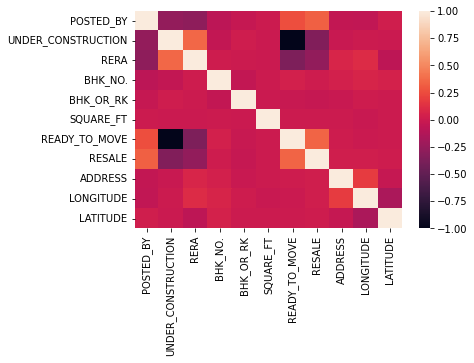

In [32]:
sns.heatmap(x.corr())

## Dados processados. Agora separar os dados de treino e teste, treinar e aplicar o modelo de Regressão.

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = (0.3))

In [27]:
modelo = DecisionTreeRegressor()

In [28]:
modelo = modelo.fit(x_train, y_train)

In [29]:
accuracy = modelo.score (x_test, y_test)

In [30]:
print(accuracy)

0.9173443577880165
